Classification Report for gini and Minimum Impurity Decrease 0.0

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      8785
           1       0.50      0.65      0.57      1705

    accuracy                           0.84     10490
   macro avg       0.72      0.76      0.73     10490
weighted avg       0.86      0.84      0.85     10490



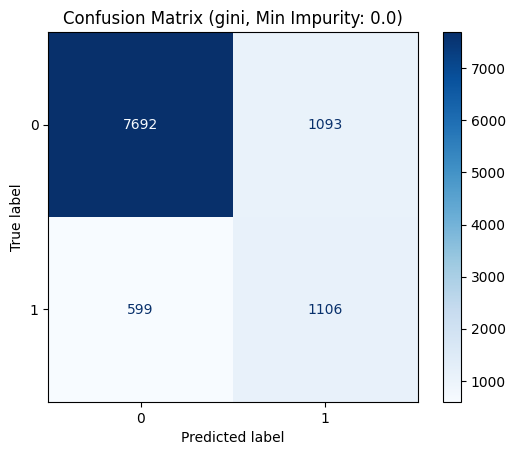

Classification Report for gini and Minimum Impurity Decrease 0.005

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8785
           1       0.50      0.38      0.43      1705

    accuracy                           0.84     10490
   macro avg       0.69      0.65      0.67     10490
weighted avg       0.82      0.84      0.83     10490



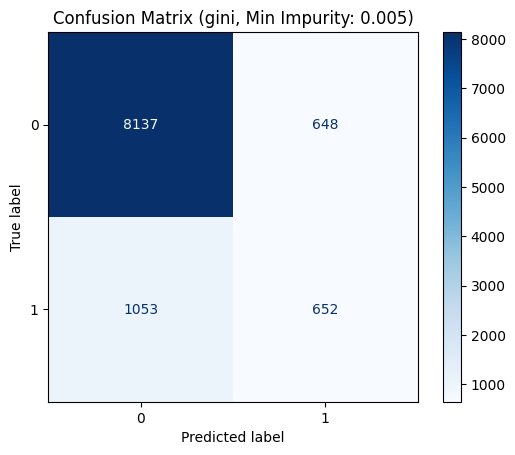

Classification Report for gini and Minimum Impurity Decrease 0.01

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8785
           1       0.46      0.39      0.42      1705

    accuracy                           0.83     10490
   macro avg       0.67      0.65      0.66     10490
weighted avg       0.82      0.83      0.82     10490



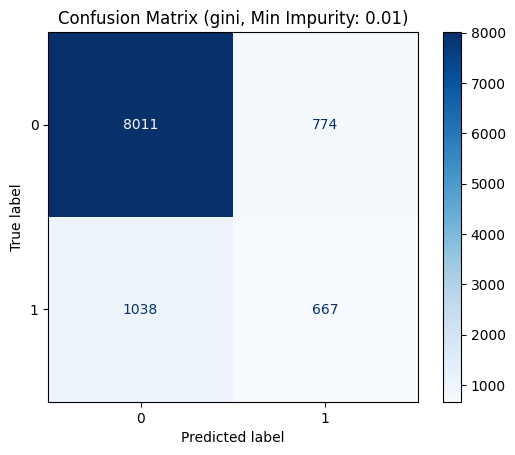

Classification Report for gini and Minimum Impurity Decrease 0.02

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8785
           1       0.45      0.29      0.35      1705

    accuracy                           0.83     10490
   macro avg       0.66      0.61      0.63     10490
weighted avg       0.80      0.83      0.81     10490



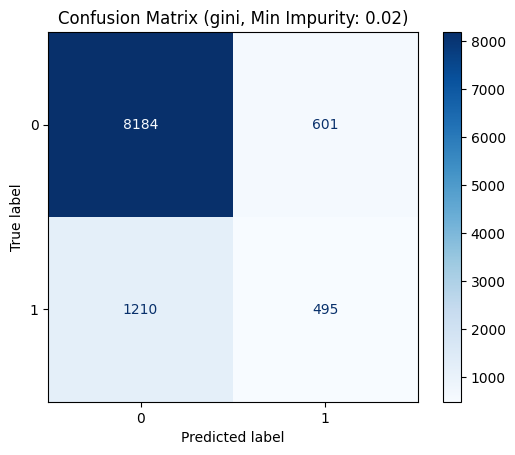

Classification Report for entropy and Minimum Impurity Decrease 0.0

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      8785
           1       0.52      0.68      0.59      1705

    accuracy                           0.84     10490
   macro avg       0.73      0.78      0.75     10490
weighted avg       0.87      0.84      0.85     10490



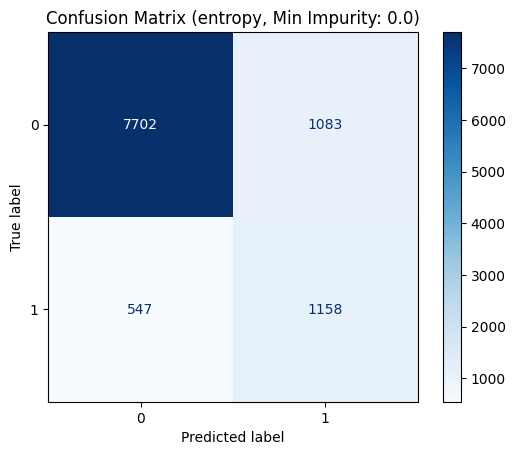

Classification Report for entropy and Minimum Impurity Decrease 0.005

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      8785
           1       0.51      0.37      0.43      1705

    accuracy                           0.84     10490
   macro avg       0.70      0.65      0.67     10490
weighted avg       0.82      0.84      0.83     10490



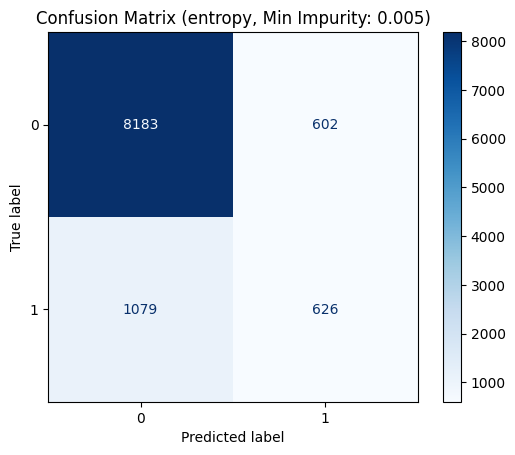

Classification Report for entropy and Minimum Impurity Decrease 0.01

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8785
           1       0.46      0.39      0.42      1705

    accuracy                           0.83     10490
   macro avg       0.67      0.65      0.66     10490
weighted avg       0.82      0.83      0.82     10490



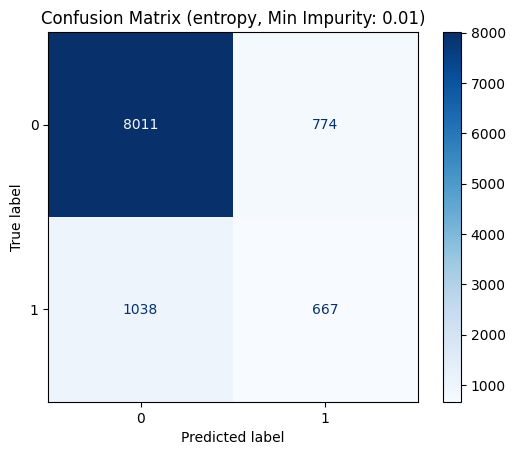

Classification Report for entropy and Minimum Impurity Decrease 0.02

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8785
           1       0.45      0.29      0.35      1705

    accuracy                           0.83     10490
   macro avg       0.66      0.61      0.63     10490
weighted avg       0.80      0.83      0.81     10490



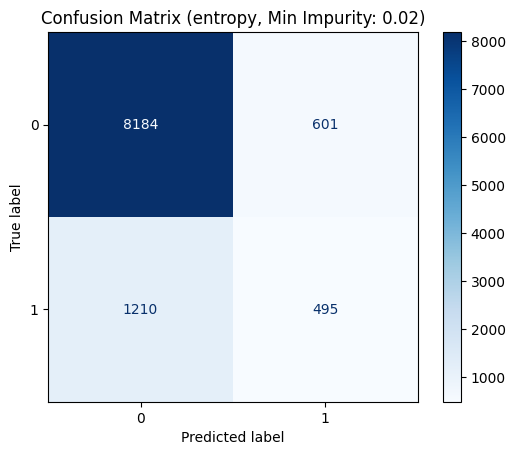

Recap of classification reports
Decision tree 1
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      8785
           1       0.50      0.65      0.57      1705

    accuracy                           0.84     10490
   macro avg       0.72      0.76      0.73     10490
weighted avg       0.86      0.84      0.85     10490

Decision tree 2
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8785
           1       0.50      0.38      0.43      1705

    accuracy                           0.84     10490
   macro avg       0.69      0.65      0.67     10490
weighted avg       0.82      0.84      0.83     10490

Decision tree 3
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8785
           1       0.46      0.39      0.42      1705

    accuracy                           0.83     10490
   macro avg       0.67      0.65      0.66     

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

def train_decision_tree(X_train, X_test, y_train, y_test, criterion='gini', min_impurity_decrease=0.0):
    clf = DecisionTreeClassifier(
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        random_state=42,
        min_samples_split=3
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    print(f"Classification Report for {criterion} and Minimum Impurity Decrease {min_impurity_decrease}\n")
    print(cr)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({criterion}, Min Impurity: {min_impurity_decrease})')
    plt.show()
    return cr

# Load data
data = pd.read_csv('preprocessed_crime_data.csv')

# Ensure DATE OCC is datetime
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])

# Split data based on years
train_data = data[data['DATE OCC'].dt.year.isin([2021, 2022])]
test_data = data[data['DATE OCC'].dt.year.isin([2023, 2024])]

# Features and labels
features = [col for col in data.columns if col not in ['Target', 'DATE OCC', 'Is Violent', 'Crime Count']]
X_train = train_data[features].values
X_test = test_data[features].values
y_train = train_data['Target'].values
y_test = test_data['Target'].values

# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Run multiple experiments
arr_crits = ["gini", "entropy"]
arr_min_imp_dcrses = [0.0, 0.005, 0.01, 0.02]
crs = []

for crit in arr_crits:
    for m_i_dcrses in arr_min_imp_dcrses:
        crs.append(train_decision_tree(X_train, X_test, y_train, y_test, criterion=crit, min_impurity_decrease=m_i_dcrses))

# Recap
print("Recap of classification reports")
for i, cr in enumerate(crs, 1):
    print(f"Decision tree {i}\n{cr}")
